In [1]:
import pandas as pd 
import numpy as np  

In [2]:
dataset = pd.read_csv('dataset/medical_examination.csv')
dataset

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
dataset.isnull().sum()

id             0
age            0
sex            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
def bmi (weight,  height):
    index = weight / ((height * .01)  ** 2)
    if index > 25:
        return 0
    else:
        return 1

In [5]:
dataset['overweight'] = dataset.apply(lambda row: bmi(row['weight'], row['height']), axis=1)
dataset

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,0


In [6]:
dataset['cholesterol'] = np.where(dataset['cholesterol'] > 1, 1, 0)
dataset['gluc'] = np.where(dataset['gluc'] > 1, 1, 0)
dataset

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,0


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def draw_cat_plot():
    # Assuming you have a dataset DataFrame
    
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(dataset, id_vars="cardio", value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    # You will have to rename one of the columns for the catplot to work correctly.
    df_cat.rename(columns={'variable': 'variable', 'value': 'value', 'total': 'total'}, inplace=True)

    # Draw the catplot with 'sns.catplot()'
    g = sns.catplot(x='variable', y='total', hue='value', col='cardio', kind='bar', data=df_cat)

    # Set plot labels and title
    g.set_axis_labels("Variables", "Total")
    g.set_titles("Cardio {col_name}")
    
    # Get the figure for the output
    fig = plt.gcf()

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


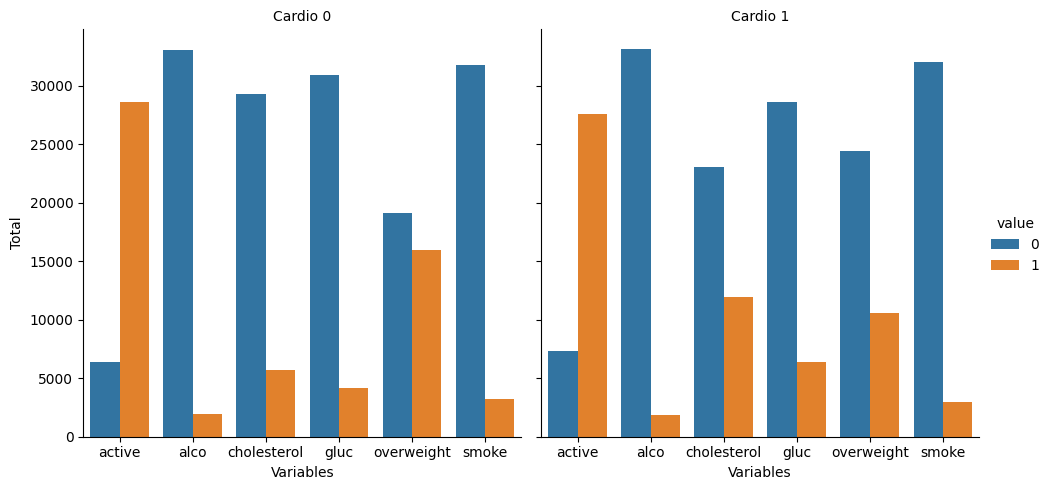

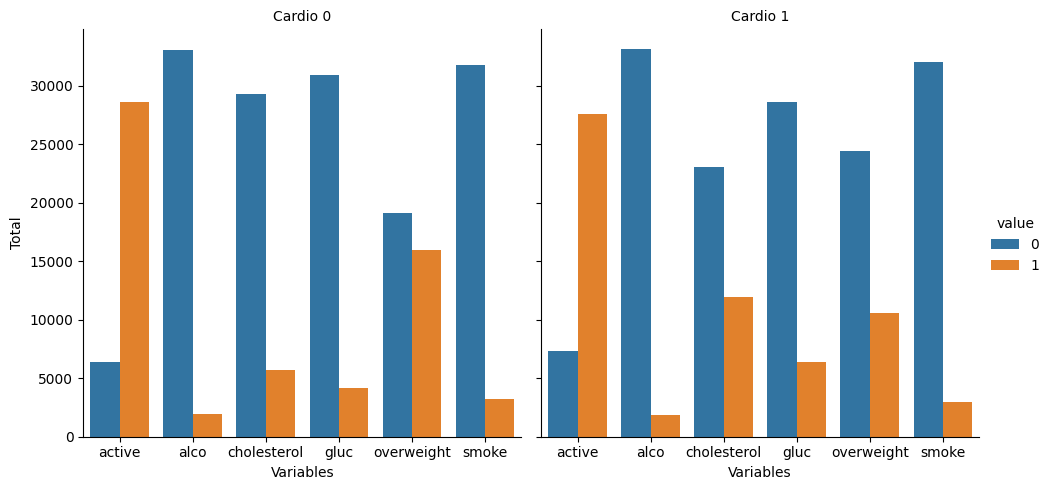

In [8]:
draw_cat_plot()

In [9]:
filtered_dataset = dataset[
    (dataset['ap_lo'] <= dataset['ap_hi']) &            
    (dataset['height'] >= dataset['height'].quantile(0.025)) &   
    (dataset['height'] <= dataset['height'].quantile(0.975)) &  
    (dataset['weight'] >= dataset['weight'].quantile(0.025)) &  
    (dataset['weight'] <= dataset['weight'].quantile(0.975)) ]

In [10]:
filtered_dataset

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,1
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,0
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,0


In [14]:
corr = filtered_dataset.corr()

In [24]:
mask = np.zeros_like(corr, dtype= bool)
mask[np.triu_indices_from(mask)] = True

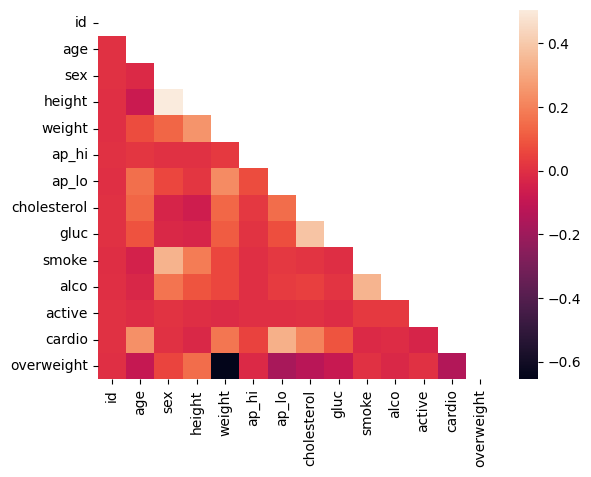

In [30]:
heatmap_plot = sns.heatmap(corr, mask= mask)


In [31]:
fig = heatmap_plot.get_figure()
fig.savefig('heatmap_hedical.jpg')